<a href="https://colab.research.google.com/github/Khemchand5487/MLnow_2.0/blob/main/3_1_Univarient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univarient Linear Regression

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: June 6, 2021


**Author**:
 Khem chand

**Reach out**:
[GitHub](https://github.com/khemchand5487) | [LinkedIn](https://www.linkedin.com/in/khemchand5487/)

[[Course Repository](https://github.com/Khemchand5487/Learning-Machine-Learning)]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/machine learning/02_EDA/student'

/content/drive/MyDrive/machine learning/02_EDA/student


In [3]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [4]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [5]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [6]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [7]:
uniMathData.to_csv('univariate_MathData_2.csv')

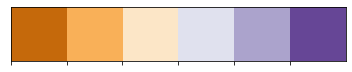

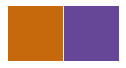

In [8]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [9]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

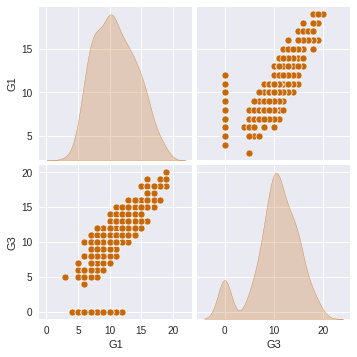

In [10]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

In [11]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [12]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [13]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [14]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [15]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [16]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [52]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.0001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [53]:
numEpochs = 5000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
10/10 [==============================] - 0s 5ms/step - loss: 1.8323 - mae: 1.8323 - mse: 8.2817 - val_loss: 1.5949 - val_mae: 1.5949 - val_mse: 6.1516
Epoch 2502/5000
10/10 [==============================] - 0s 5ms/step - loss: 1.8323 - mae: 1.8323 - mse: 8.2817 - val_loss: 1.5949 - val_mae: 1.5949 - val_mse: 6.1518
Epoch 2503/5000
10/10 [==============================] - 0s 5ms/step - loss: 1.8323 - mae: 1.8323 - mse: 8.2816 - val_loss: 1.5951 - val_mae: 1.5951 - val_mse: 6.1522
Epoch 2504/5000
10/10 [==============================] - 0s 5ms/step - loss: 1.8324 - mae: 1.8324 - mse: 8.2817 - val_loss: 1.5950 - val_mae: 1.5950 - val_mse: 6.1522
Epoch 2505/5000
10/10 [==============================] - 0s 5ms/step - loss: 1.8324 - mae: 1.8324 - mse: 8.2819 - val_loss: 1.5949 - val_mae: 1.5949 - val_mse: 6.1515
Epoch 2506/5000
10/10 [==============================] - 0s 5ms/step - loss: 1.8323 - mae: 1.8323 - mse: 8.2817 - 

In [54]:
print(history)

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


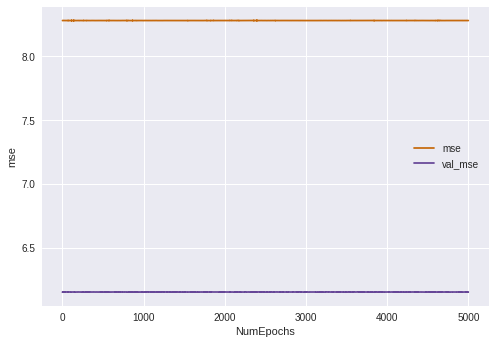

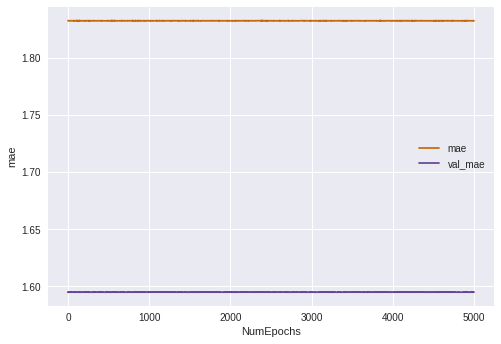

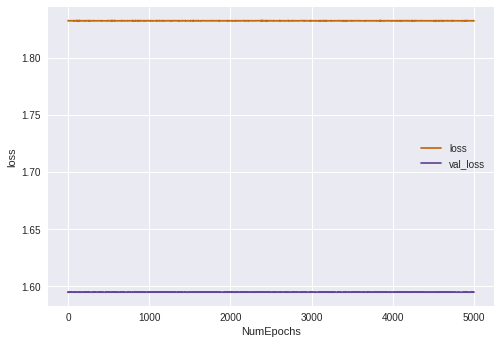

In [56]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [57]:
model.predict([1])

array([[1.0000991]], dtype=float32)

In [58]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.0000991]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.0000991]
 [2.0001032]
 [3.0001073]
 [4.000111 ]
 [5.000115 ]]

List of Predictions (flattened out):
[1.0000991 2.0001032 3.0001073 4.000111  5.000115 ]



In [59]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [60]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [61]:
print(len(testPreds))
print(testPreds)

79
[14.000153   6.000119  11.00014   17.000164  17.000164  12.000144
 14.000153  19.000172  19.000172   8.000128  14.000153  13.000148
  8.000128   7.0001235  9.000132  13.000148  11.00014   16.00016
  7.0001235 10.000135  15.000156  13.000148  14.000153  16.00016
  7.0001235  7.0001235  8.000128  10.000135  12.000144  10.000135
 12.000144  13.000148  10.000135   6.000119   9.000132  12.000144
  7.0001235  8.000128  14.000153   9.000132   9.000132   7.0001235
 12.000144   6.000119  13.000148   7.0001235  7.0001235 11.00014
 13.000148  17.000164  12.000144  15.000156   9.000132  12.000144
 15.000156  12.000144  15.000156  12.000144  15.000156  11.00014
 12.000144   8.000128  16.00016    7.0001235 16.00016   11.00014
 16.00016   13.000148   8.000128   8.000128  12.000144  18.000168
 13.000148  16.00016   10.000135   7.0001235 10.000135   7.0001235
 11.00014  ]


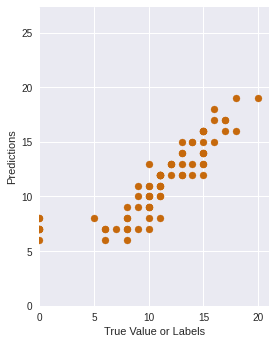

In [62]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

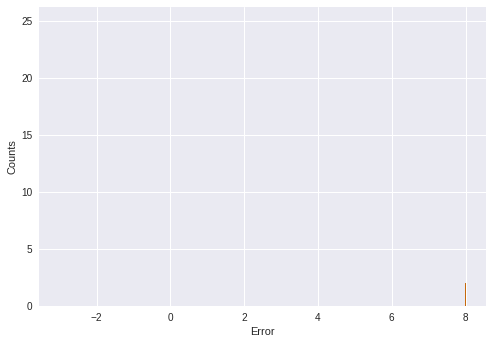

In [63]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

In [64]:
testPreds

array([14.000153 ,  6.000119 , 11.00014  , 17.000164 , 17.000164 ,
       12.000144 , 14.000153 , 19.000172 , 19.000172 ,  8.000128 ,
       14.000153 , 13.000148 ,  8.000128 ,  7.0001235,  9.000132 ,
       13.000148 , 11.00014  , 16.00016  ,  7.0001235, 10.000135 ,
       15.000156 , 13.000148 , 14.000153 , 16.00016  ,  7.0001235,
        7.0001235,  8.000128 , 10.000135 , 12.000144 , 10.000135 ,
       12.000144 , 13.000148 , 10.000135 ,  6.000119 ,  9.000132 ,
       12.000144 ,  7.0001235,  8.000128 , 14.000153 ,  9.000132 ,
        9.000132 ,  7.0001235, 12.000144 ,  6.000119 , 13.000148 ,
        7.0001235,  7.0001235, 11.00014  , 13.000148 , 17.000164 ,
       12.000144 , 15.000156 ,  9.000132 , 12.000144 , 15.000156 ,
       12.000144 , 15.000156 , 12.000144 , 15.000156 , 11.00014  ,
       12.000144 ,  8.000128 , 16.00016  ,  7.0001235, 16.00016  ,
       11.00014  , 16.00016  , 13.000148 ,  8.000128 ,  8.000128 ,
       12.000144 , 18.000168 , 13.000148 , 16.00016  , 10.0001

In [65]:
testLabels

9      15
25      8
28     11
31     17
32     16
       ..
365    10
367     0
379    10
381     7
393    10
Name: G3, Length: 79, dtype: int64